## Tarea 4.2 - Variables categóricas ordinales
Luis Alfonso Guerrero Montaño


### Variables categoricas ordinales

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
import pandas as pd
ruta='/content/gdrive/MyDrive/Colab Notebooks/'
data = pd.read_csv(ruta+'data.csv')

In [8]:
data.head()

,Escolaridad,No. de hijos
0,Primaria trunca,9
1,Secundaria,3
2,Preparatoria,2
3,Sin escolaridad,3
4,Primaria,2


1. Sustituya los datos de la variable categórica por los coeficientes de un polinomio lineal cuya suma sea cero.

In [13]:
Ord = data['Escolaridad'].unique()
Ord

array(['Primaria trunca', 'Secundaria', 'Preparatoria', 'Sin escolaridad',
       'Primaria'], dtype=object)

In [29]:
# Redefino el orden
import numpy as np
Ord = np.array(['Sin escolaridad', 'Primaria trunca', 'Primaria', 'Secundaria',
                'Preparatoria'])
Ord

array(['Sin escolaridad', 'Primaria trunca', 'Primaria', 'Secundaria',
       'Preparatoria'], dtype='<U15')

In [30]:
# Variable Escolaridad 

n=len(Ord)                                # Cardinalidad
m=-(n-1) if n%2==0 else -int((n-1)/2)     # Valor mínimo
inc= 2 if n%2==0 else 1                   # Incremento de 'x'
x=range(m,-m+1,inc)                       # Variable independiente
for i in x:
  print(i)

-2
-1
0
1
2


In [31]:
# Codifición lineal
a0=0
a1=2 # Diferencia entre categorías
#y=a0+a1*x
LinEsc={k:a0+a1*i for k,i in zip(Ord,x)}
LinEsc

{'Preparatoria': 4,
 'Primaria': 0,
 'Primaria trunca': -2,
 'Secundaria': 2,
 'Sin escolaridad': -4}

In [32]:
dataL=data.copy()
dataL['LinEscolaridad']=data['Escolaridad'].map(LinEsc)    # Mapeamos el diccionario
dataL

,Escolaridad,No. de hijos,LinEscolaridad
0,Primaria trunca,9,-2
1,Secundaria,3,2
2,Preparatoria,2,4
3,Sin escolaridad,3,-4
4,Primaria,2,0
...,...,...,...
5055,Secundaria,1,2
5056,Preparatoria,3,4
5057,Primaria,1,0
5058,Secundaria,3,2


2. Muestre en un gráfico la escolaridad contra el número de hijos usando la función *scatter* de *matplotlib.pyplot*.

Text(0, 0.5, 'No. de hijos')

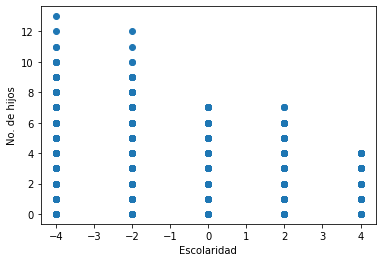

In [33]:
import matplotlib.pyplot as plt

plt.scatter(dataL['LinEscolaridad'], dataL['No. de hijos'])
plt.xlabel('Escolaridad')
plt.ylabel('No. de hijos')

3. Sustituya ahora la variable categórica por los coeficientes de un polinomio cuadrático cuya suma sea cero.

In [34]:
# Codificación cuadrática
# 
a1=0
a2=-0.25 # Cóncava
a0=-a2*np.sum([i**2 for i in x])/n
CuadEsc={k:a0+a1*i+a2*i**2 for k,i in zip(Ord,x)}
CuadEsc

{'Preparatoria': -0.5,
 'Primaria': 0.5,
 'Primaria trunca': 0.25,
 'Secundaria': 0.25,
 'Sin escolaridad': -0.5}

In [35]:
CuadEsc.values()

dict_values([-0.5, 0.25, 0.5, 0.25, -0.5])

In [36]:
s=0
for i in CuadEsc.values():
  s += i
s

0.0

In [37]:
dataL['CuadEsc']=data['Escolaridad'].map(CuadEsc)
dataL

,Escolaridad,No. de hijos,LinEscolaridad,CuadEsc
0,Primaria trunca,9,-2,0.25
1,Secundaria,3,2,0.25
2,Preparatoria,2,4,-0.50
3,Sin escolaridad,3,-4,-0.50
4,Primaria,2,0,0.50
...,...,...,...,...
5055,Secundaria,1,2,0.25
5056,Preparatoria,3,4,-0.50
5057,Primaria,1,0,0.50
5058,Secundaria,3,2,0.25


4. Obtenga una relación lineal usando la clase *LinearRegression* del paquete *sklearn.linear_model*, para la $X=\{Escolaridad\_1, Escolaridad\_2\}$ y $Y=No.de\_hijos$.

Donde $Escolaridad\_1$ es la codificación con coeficientes de grado uno y $Escolaridad\_2$ es la codificación con los coeficientes de grado dos.

In [38]:
from sklearn.linear_model import LinearRegression

In [41]:
X = dataL[['LinEscolaridad', 'CuadEsc']]
X

,LinEscolaridad,CuadEsc
0,-2,0.25
1,2,0.25
2,4,-0.50
3,-4,-0.50
4,0,0.50
...,...,...
5055,2,0.25
5056,4,-0.50
5057,0,0.50
5058,2,0.25


In [42]:
reg=LinearRegression()
reg.fit(X, dataL['No. de hijos'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
reg.coef_, X.columns

(array([-0.26016891, -0.31941393]),
 Index(['LinEscolaridad', 'CuadEsc'], dtype='object'))

5. Realice dos gráficas de la relación obtenida:
$$y=coef\_[0]*Escolaridad\_1+intercept\_$$
y
$$y=coef\_[1]*Escolaridad\_2+intercept\_$$

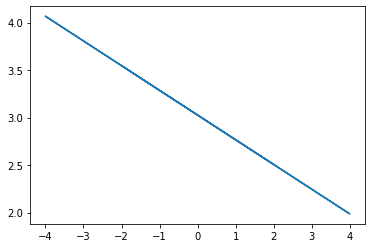

In [52]:
plt.plot(X['LinEscolaridad'], (reg.coef_[0]*X['LinEscolaridad'])+reg.intercept_)

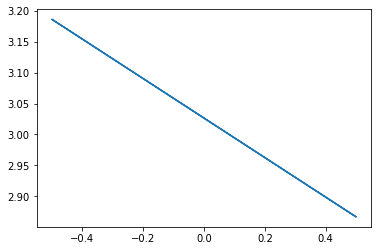

In [53]:
plt.plot(X['CuadEsc'], (reg.coef_[1]*X['CuadEsc'])+reg.intercept_)